In [44]:
import numpy as np
import pandas as pd
import matplotlib as  mpl
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns
import warnings
import sys
import time
# 不想有warning输出
warnings.filterwarnings('ignore')
# 用来显示中文标签
mpl.rcParams["font.family"] = "SimHei"
# 用来显示负号
mpl.rcParams["axes.unicode_minus"] = False

In [6]:
na_vals = ["\\N"," ","","NULL"]

df_tmp = []

df_train = pd.DataFrame(index=["0"],dtype=np.float32)

count = 0

for chunk in pd.read_csv(r'D:\Desktop\淘宝用户行为数据\UserBehavior.csv',header=None,sep=',',chunksize=200000,nrows=10000000,error_bad_lines=False,delimiter="\t",lineterminator="\n",keep_default_na=True, na_values=na_vals):

    df_tmp.append(chunk[1:])

    del chunk

    print("the chunk " + str(count) + " has been stored...")

    print("the mem-cost is now: ", str(sys.getsizeof(df_tmp)/(1) ), "MB \n")


the chunk 0 has been stored...
the mem-cost is now:  88.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  88.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  88.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  88.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  120.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  120.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  120.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  120.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  184.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  184.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  184.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  184.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  184.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  184.0 MB 

the chunk 0 has been stored...
the mem-cost is now:  184.0 MB 

the chunk 0 has been stored...
the mem-cost 

In [3]:
# 写入数据

with open(r'D:\Desktop\淘宝用户行为数据\UserBehavior.csv', 'r') as f: 
        with open(r'D:\Desktop\淘宝用户行为数据\UserBehavior_new.csv','w') as fout: 
            block = [] 
            for line in f: 
                block.append(line) 
                if len(block) <= 1000000:  
                        fout.write(','.join(line.split(' ')))  
                else: 
                      break 

In [4]:
df = pd.read_csv(r"D:\Desktop\淘宝用户行为数据\UserBehavior_new.csv",header=None,names=['用户id','商品ID','商品类目ID','行为类型','时间戳'])
data=df.take(indices=np.random.permutation(df.shape[0]),axis=0)[0:1000000]
data.to_csv(r"D:\Desktop\淘宝用户行为数据\UserBehavior_new01.csv")
data

,用户id,商品ID,商品类目ID,行为类型,时间戳
838937,121423,2128285,4022701,pv,1511785415
758445,117671,3946755,3607361,pv,1512120629
283321,1012808,3265014,4434812,buy,1512267818
728113,116414,165048,149192,pv,1511573975
415811,102682,1681622,154040,pv,1511591113
...,...,...,...,...,...
504648,10639,3887067,4181361,pv,1512260349
780403,118867,1729537,848854,pv,1512305526
664080,113462,3445001,4801426,pv,1511791372
28035,1001265,2990368,4298656,pv,1512142460


In [5]:
#查看是否存在重复的行数据
(data.duplicated()).sum()

0

In [6]:
#查看列中是否存在缺失数据返回true证明有缺失数据,false：没有缺失数据
data.isnull().any(axis=0)

用户id      False
商品ID      False
商品类目ID    False
行为类型      False
时间戳       False
dtype: bool

In [7]:
data.head().info()#展示前五行数据

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 838937 to 415811
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   用户id    5 non-null      int64 
 1   商品ID    5 non-null      int64 
 2   商品类目ID  5 non-null      int64 
 3   行为类型    5 non-null      object
 4   时间戳     5 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 240.0+ bytes


In [8]:
data['时间戳']=data['时间戳'].astype('str')

In [9]:
data.head().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 838937 to 415811
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   用户id    5 non-null      int64 
 1   商品ID    5 non-null      int64 
 2   商品类目ID  5 non-null      int64 
 3   行为类型    5 non-null      object
 4   时间戳     5 non-null      object
dtypes: int64(3), object(2)
memory usage: 240.0+ bytes


In [10]:
data['时间戳']=pd.to_datetime(data['时间戳'],unit='s')

In [11]:
data.head().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 838937 to 415811
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   用户id    5 non-null      int64         
 1   商品ID    5 non-null      int64         
 2   商品类目ID  5 non-null      int64         
 3   行为类型    5 non-null      object        
 4   时间戳     5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 240.0+ bytes


In [12]:
data.时间戳=pd.to_datetime(data['时间戳'])
data['date']=data['时间戳'].dt.date
data['hour']=data['时间戳'].dt.time
data['week']=data['时间戳'].dt.weekday

In [13]:
data.head()

,用户id,商品ID,商品类目ID,行为类型,时间戳,date,hour,week
838937,121423,2128285,4022701,pv,2017-11-27 12:23:35,2017-11-27,12:23:35,0
758445,117671,3946755,3607361,pv,2017-12-01 09:30:29,2017-12-01,09:30:29,4
283321,1012808,3265014,4434812,buy,2017-12-03 02:23:38,2017-12-03,02:23:38,6
728113,116414,165048,149192,pv,2017-11-25 01:39:35,2017-11-25,01:39:35,5
415811,102682,1681622,154040,pv,2017-11-25 06:25:13,2017-11-25,06:25:13,5


In [14]:
data.head().info()#查看数据类型

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 838937 to 415811
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   用户id    5 non-null      int64         
 1   商品ID    5 non-null      int64         
 2   商品类目ID  5 non-null      int64         
 3   行为类型    5 non-null      object        
 4   时间戳     5 non-null      datetime64[ns]
 5   date    5 non-null      object        
 6   hour    5 non-null      object        
 7   week    5 non-null      int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 360.0+ bytes


In [15]:
data['时间戳']>'2017-01-01'

838937    True
758445    True
283321    True
728113    True
415811    True
          ... 
504648    True
780403    True
664080    True
28035     True
787727    True
Name: 时间戳, Length: 1000000, dtype: bool

In [16]:
#发现全是2017年的数据没有异常值
data['时间戳'].max(),data['时间戳'].min()

(Timestamp('2017-12-03 16:00:06'), Timestamp('2017-09-11 08:16:39'))

In [17]:
data['时间戳'].value_counts()

2017-12-02 09:21:04    27
2017-11-27 14:30:37    21
2017-11-28 08:52:51    20
2017-11-30 11:37:55    17
2017-12-02 15:33:56    15
                       ..
2017-11-30 05:04:07     1
2017-12-01 22:57:09     1
2017-12-01 13:06:04     1
2017-11-28 02:01:04     1
2017-11-29 08:06:56     1
Name: 时间戳, Length: 499049, dtype: int64

In [18]:
data.head()

,用户id,商品ID,商品类目ID,行为类型,时间戳,date,hour,week
838937,121423,2128285,4022701,pv,2017-11-27 12:23:35,2017-11-27,12:23:35,0
758445,117671,3946755,3607361,pv,2017-12-01 09:30:29,2017-12-01,09:30:29,4
283321,1012808,3265014,4434812,buy,2017-12-03 02:23:38,2017-12-03,02:23:38,6
728113,116414,165048,149192,pv,2017-11-25 01:39:35,2017-11-25,01:39:35,5
415811,102682,1681622,154040,pv,2017-11-25 06:25:13,2017-11-25,06:25:13,5


In [19]:
data.head().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 838937 to 415811
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   用户id    5 non-null      int64         
 1   商品ID    5 non-null      int64         
 2   商品类目ID  5 non-null      int64         
 3   行为类型    5 non-null      object        
 4   时间戳     5 non-null      datetime64[ns]
 5   date    5 non-null      object        
 6   hour    5 non-null      object        
 7   week    5 non-null      int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 360.0+ bytes


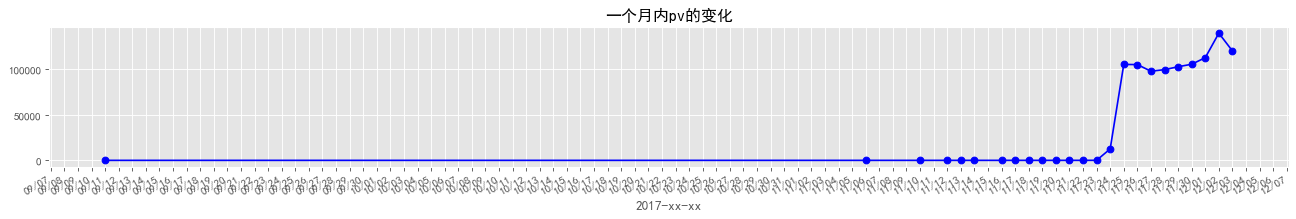

In [20]:
import matplotlib.dates as mdates
from datetime import timedelta
#每天pv、uv的变化
d_pv=data.groupby('date').用户id.count()#groupby 里面不能用时间戳
d_uv=data.groupby('date').用户id.nunique()#date默认为字符串类型

#mdates=df['时间戳']
plt.style.use('ggplot')
plt.figure(figsize=(20,18),dpi=80)
plt.subplot(611)
plt.plot(d_pv.index,d_pv.values,'bo-')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()#自动旋转日期标记
plt.xlabel('2017-xx-xx')
plt.title('一个月内pv的变化')
plt.show()

In [25]:
#发现空白值过多
ex=(data['时间戳']>='2017-11-07')&(data['时间戳']<='2017-12-07')
data_new=data.loc[ex]
data_new['时间戳'].max(),data_new['时间戳'].min()

(Timestamp('2017-12-03 16:00:06'), Timestamp('2017-11-10 13:33:35'))

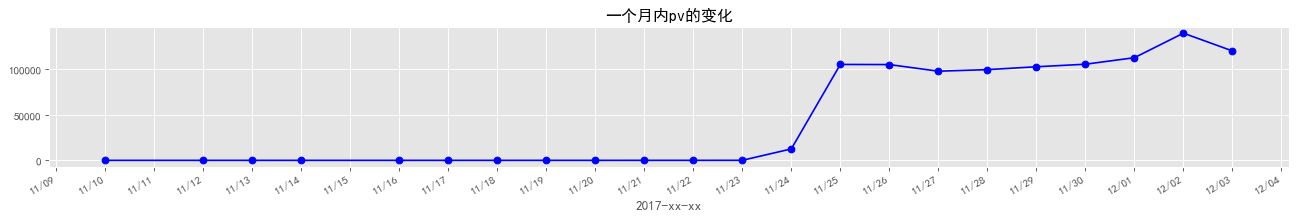

In [26]:
#每天pv、uv的变化
d_pv=data_new.groupby('date').用户id.count()
d_uv=data_new.groupby('date').用户id.nunique()

#mdates=df['时间戳']
plt.style.use('ggplot')
plt.figure(figsize=(20,18),dpi=80)
plt.subplot(611)
plt.plot(d_pv.index,d_pv.values,'bo-')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()#自动旋转日期标记
plt.xlabel('2017-xx-xx')
plt.title('一个月内pv的变化')
plt.show()

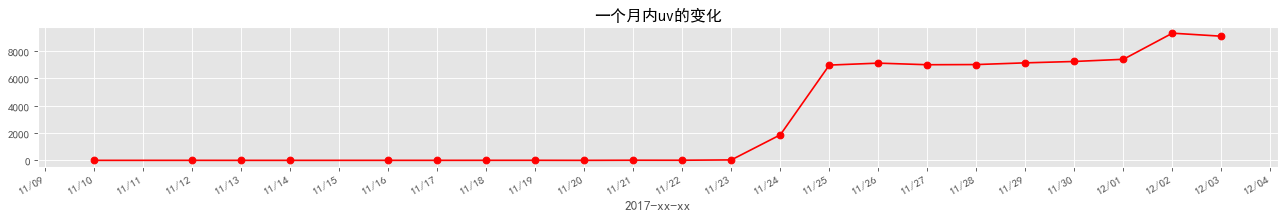

In [27]:
plt.figure(figsize=(20,18),dpi=80)
plt.subplot(611)
plt.plot(d_uv.index,d_uv.values,'ro-')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()#自动旋转日期标记
plt.xlabel('2017-xx-xx')
plt.title('一个月内uv的变化')
plt.show()

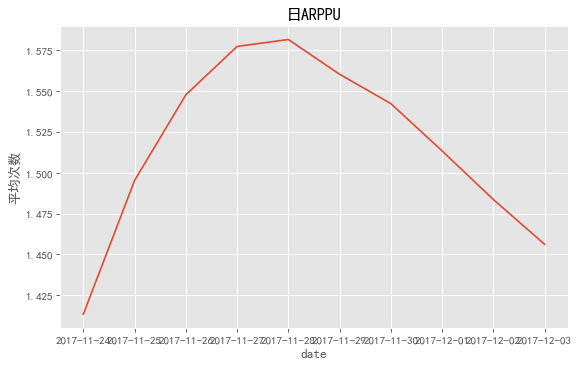

In [28]:
#运营指标：日ARPPU,日ARPU
#日ARPPU每付费平均费用=总收入/活跃付费用户数（由于没有具体金额，所以使用消费总数代替总金额）
#每天每人消费总次数
one_user_buy1=data_new[data_new['行为类型']=='buy'].groupby(['date','用户id']).size().reset_index().rename(columns={0:'total'})
#one_user_buy1.head()
one_user_buy2=one_user_buy1.groupby('date')['total'].sum()/one_user_buy1.groupby('date')['total'].count()
plt.figure(figsize=(18,5), dpi=80)
plt.subplot(121)
one_user_buy2.plot()
plt.ylabel('平均次数')
plt.title('日ARPPU')
plt.show()

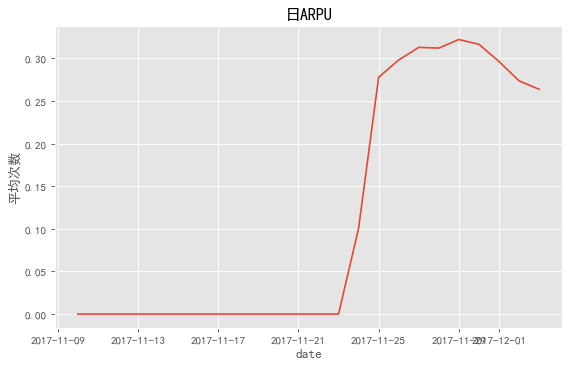

In [29]:
#日ARPU平均每活跃用户消费次数
data_new['operation']=1
#每天不同用户不同行为类型次数
data_new_user_active1=data_new.groupby(['date','用户id','行为类型'])['operation'].count().reset_index().rename(columns={'operation':'total'})
#data_user_active.head()
plt.figure(figsize=(18,5), dpi=80)
plt.subplot(122)
data_user_active2=data_new_user_active1.groupby('date').apply(lambda x: x[x.行为类型 =='buy'].total.sum()/len(x.用户id.unique()))
data_user_active2.plot()
plt.ylabel('平均次数')
plt.title('日ARPU')
plt.show()

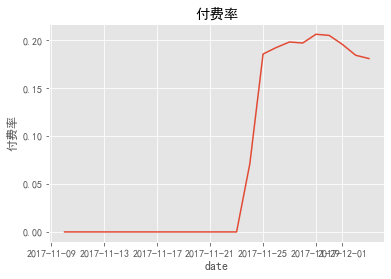

In [30]:
#付费率
buy_rate=data_new_user_active1.groupby('date').apply(lambda x:x[x.行为类型=='buy'].total.count()/len(x.用户id.unique()))
buy_rate.plot()
plt.ylabel('付费率')
plt.title('付费率')
plt.show()

In [37]:
#复购率

In [38]:
re_buy1=data_new[data_new.行为类型=='buy'].groupby('用户id')['date'].apply(lambda x:len(x.unique()))
re_buy2=re_buy1[re_buy1>=2].count()/re_buy1.count()
re_buy2

0.5528479593362237

No handles with labels found to put in legend.


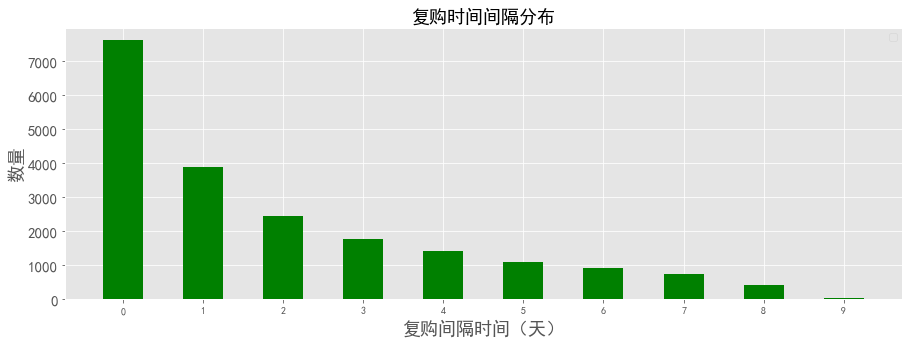

In [39]:
#复购时间消费间隔次数
re_day_buy=data_new[data_new.行为类型=='buy'].groupby('用户id').date.apply(lambda x: x.sort_values()).diff(1).dropna()
re_day_buy=re_day_buy.map(lambda x: abs(x.days))
df1= re_day_buy.value_counts()
plt.figure(figsize=(15,5)) 
X=df1.index
Y=df1.values
plt.bar(range(len(X)),Y,tick_label=X,color='g',width=0.5)
font={'size':18,}
plt.ylabel('数量',font)
plt.xlabel('复购间隔时间（天）',font)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15) 
plt.legend()
plt.title('复购时间间隔分布',fontsize=18)
plt.show()

No handles with labels found to put in legend.


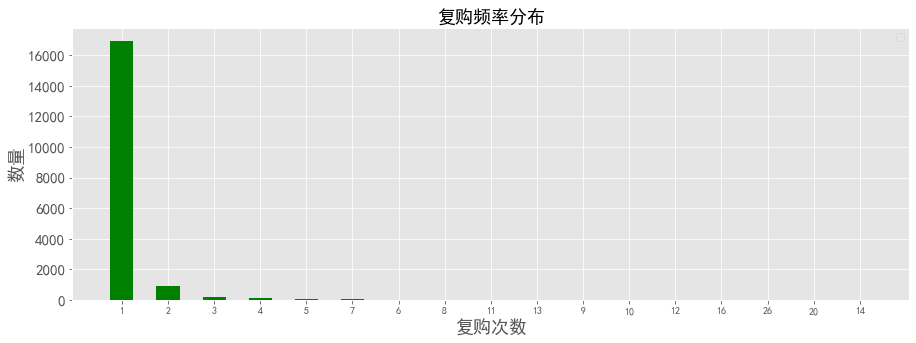

In [40]:
#大部分人的复购时间间隔都是在7天内，随着消费时间间隔的增大，消费人数也在随之减少，因此可以考虑把营销重点放在复购率在7天内的客户
#同一时间段，用户复购次数

samedt_user_buy=data_new[data_new['行为类型']=='buy'].groupby(['用户id','date','hour'])['operation'].sum()
df2= samedt_user_buy.value_counts()

plt.figure(figsize=(15,5)) 
X=df2.index
Y=df2.values
plt.bar(range(len(X)),Y,tick_label=X,color='g',width=0.5)
font={'size':18,}
plt.ylabel('数量',font)
plt.xlabel('复购次数',font)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15) 
plt.legend()
plt.title('复购频率分布',fontsize=18)
plt.show()

In [41]:
#大部分人的消费次数在4次以内，可把营销推广对象重点关注大于6次消费的顾客
#建立n日留存率计算函数
def cal_retention(data_new,n): #n为n日留存
    user=[]
    date=pd.Series(data_new.date.unique()).sort_values()[:-n] #时间截取至最后一天的前n天
    retention_rates=[]
    new_users=[]
    retention_user=[]
    for i in date:
        new_user=set(data_new[data_new.date==i].用户id.unique())-set(user) #识别新用户，本案例中设初始用户量为零
        user.extend(new_user)  #将新用户加入用户群中
        #第n天留存情况
        user_nday=data_new[data_new.date==i+timedelta(n)].用户id.unique() #第n天登录的用户情况
        a=0
        for 用户id in user_nday:
            if 用户id in new_user:
                a+=1
        b = len(new_user)
        retention_rate=a/b #计算该天第n日留存率
        if a/b==0:
            print('false')
        retention_rates.append(retention_rate) #汇总n日留存数据
        new_users.append(b) #汇总n日的新用户数
        retention_user.append(a) #汇总n日留存的用户数
    data_new_user = pd.Series(new_users, index=date)
    data_retention_user = pd.Series(retention_user, index=date)
    data_retention_rate = pd.Series(retention_rates,index=date)
    data_retention = pd.concat([data_new_user,data_retention_user,data_retention_rate], axis=1)
    data_retention.columns=['new_user','retention_user','retention_rate']
    return data_retention
data_retention=cal_retention(data_new,1)
data_retention=data_retention.rename(columns={'new_user':'新用户数','retention_user':'次日留存用户数','retention_rate':'次日留存率'})
data_retention3=cal_retention(data_new,3)
data_retention3=data_retention3.rename(columns={'new_user':'新用户数','retention_user':'3日留存用户数','retention_rate':'3日留存率'})
data_retention7=cal_retention(data,7)
data_retention7=data_retention7.rename(columns={'new_user':'新用户数','retention_user':'7日留存用户数','retention_rate':'7日留存率'})
data_retention14=cal_retention(data_new,14)
data_retention14=data_retention14.rename(columns={'new_user':'新用户数','retention_user':'14日留存用户数','retention_rate':'14日留存率'})
data_retention3.drop(['新用户数'],axis=1,inplace=True)
data_retention7.drop(['新用户数'],axis=1,inplace=True)
data_retention14.drop(['新用户数'],axis=1,inplace=True)

retention=pd.concat([data_retention,data_retention3,data_retention7,data_retention14],axis=1)
retention


false
false
false
false
false
false
false
false
false
false


ZeroDivisionError: division by zero

In [42]:
data_new

,用户id,商品ID,商品类目ID,行为类型,时间戳,date,hour,week,operation
838937,121423,2128285,4022701,pv,2017-11-27 12:23:35,2017-11-27,12:23:35,0,1
758445,117671,3946755,3607361,pv,2017-12-01 09:30:29,2017-12-01,09:30:29,4,1
283321,1012808,3265014,4434812,buy,2017-12-03 02:23:38,2017-12-03,02:23:38,6,1
728113,116414,165048,149192,pv,2017-11-25 01:39:35,2017-11-25,01:39:35,5,1
415811,102682,1681622,154040,pv,2017-11-25 06:25:13,2017-11-25,06:25:13,5,1
...,...,...,...,...,...,...,...,...,...
504648,10639,3887067,4181361,pv,2017-12-03 00:19:09,2017-12-03,00:19:09,6,1
780403,118867,1729537,848854,pv,2017-12-03 12:52:06,2017-12-03,12:52:06,6,1
664080,113462,3445001,4801426,pv,2017-11-27 14:02:52,2017-11-27,14:02:52,0,1
28035,1001265,2990368,4298656,pv,2017-12-01 15:34:20,2017-12-01,15:34:20,4,1


In [43]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker
pv_users = data[data.行为类型 == 'pv']['用户id'].count()
fav_users = data[data.行为类型== 'cart']['用户id'].count()
cart_users = data[data.行为类型== 'fav']['用户id'].count()
buy_users = data[data.行为类型 == 'buy']['用户id'].count()
attr = ['pv', 'cart', 'fav', 'buy']
values = [np.around((pv_users / pv_users * 100), 2),
         np.around((cart_users / pv_users * 100), 2),
         np.around((fav_users / pv_users * 100), 2),
         np.around((buy_users / pv_users * 100), 2)]
c = (
    Funnel()
    .add(
        series_name="环节",
        data_pair=[list(z) for z in zip(attr,values)],
        sort_="descending", # 数据排序显示顺序,降序
        label_opts=opts.LabelOpts(font_size=13,position="right",formatter="{b}"),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="用户行为转化漏斗",subtitle="图中的比例表示该行为下的总行为次数占浏览行为总次数的比例"))
    .render("用户行为转化漏斗.html")
)


[[4488]
 [1164]
 [1000]
 [  37]]


Text(0.5, 1.0, '客户类群占比')

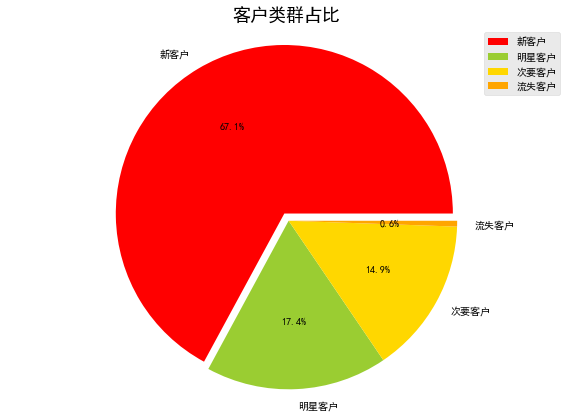

In [47]:
#RFM分析(假设现在是2017,11,28)
from datetime import datetime 
#最近一次购买距离现在的天数
data['date']=pd.to_datetime(data['date'])
recent_buy=data[data.行为类型=='buy'].groupby('用户id')['date'].apply(lambda x: datetime(2017,12,1)-x.sort_values().iloc[-1]).reset_index().rename(columns={'date':'recent'})
recent_buy.recent=recent_buy.recent.map(lambda x: x.days)
#购买频率（购买次数）
fred_buy=data[data.行为类型=='buy'].groupby('用户id').date.count().reset_index().rename(columns={'date':'fred'})
#rfm

recent_fred=pd.merge(recent_buy,fred_buy,on='用户id')
#为实现自动细分，将使用R和F变量的80%分位数
quantiles=recent_fred.quantile(q=[0.8])

recent_fred['R']=np.where(recent_fred['recent']<=int(quantiles.recent.values),2,1)#R（Recency，最近一次消费时间间隔）：指用户上一次消费距今多长时间
recent_fred['F']=np.where(recent_fred['fred']<=int(quantiles.fred.values),1,2)#F（Frequency，消费频率）：指用户在一段时间内消费的次数
recent_fred['rfm']=recent_fred.R.map(str)+recent_fred.F.map(str)              #M（Monetary，消费金额）：指用户一段时间内的消费金额

#打标签，时间越近次数越多越重要
labels = {'12':'流失客户','22': '明星客户','11':'次要客户','21':'新客户'}
recent_fred['labels']= recent_fred['rfm'].apply(lambda x: labels[x])
rfm=pd.DataFrame(recent_fred['labels'].value_counts())

plt.figure(figsize=(10,7))
#print(rfm._values) 发现是个二维数组
#rfm._values=sum(rfm._values,[])
print(rfm.values)  #报错：can't set attribute
plt.pie([4488,1164,1000,37],autopct='%1.1f%%',labels=rfm.index,explode=[0.05,0,0,0],colors=['red','yellowgreen','gold','orange'])
plt.legend()
plt.axis('equal')
plt.title('客户类群占比',fontsize=18)

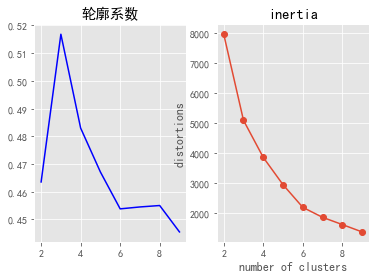

In [76]:
# 用户质量RFM聚类分析(基于消费行为特征聚类分析）
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing

#准备数据
recent_fred.用户id = recent_fred.用户id.astype('str')
X = recent_fred.values[:,1:3]

# 数据标准化(z_score)
Model = preprocessing.StandardScaler()
X = Model.fit_transform(X)

ss_score = []
inertia = []
for k in range(2,10):
    clf = KMeans(n_clusters=k,max_iter=1000)
    pred = clf.fit_predict(X) 
    ss = metrics.silhouette_score(X,pred)
    ss_score.append(ss)
    inertia.append(clf.inertia_)
    
# 做图对比    
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.plot(list(range(2,10)),ss_score,c='b')
plt.title('轮廓系数')


ax1 = fig.add_subplot(122)
plt.plot(range(2,10),inertia,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortions')
plt.title('inertia')
plt.show()


In [77]:
# 根据最佳的K值，聚类得到结果
model = KMeans(n_clusters=4,max_iter=1000)
model.fit_predict(X)
recent_fred['type']=model.labels_
rf_type=recent_fred.drop(['R','F','rfm','labels'],axis=1,inplace=False)
r=rf_type.groupby('type').mean()
r['样本个数']=rf_type['type'].value_counts()
r['样本个数占比']=r['样本个数']/rf_type['type'].count()
r['样本个数占比']=r['样本个数占比'].map(lambda x: '%.2f%%'%(x*100))
r.columns=[['R均值','F均值','样本个数','样本个数占比']]
r




,R均值,F均值,样本个数,样本个数占比
type,,,,
0,-0.794358,2.629300,4041,60.41%
1,3.669681,1.861495,2101,31.41%
2,-1.333333,39.933333,15,0.22%
3,-0.936090,9.819549,532,7.95%


In [74]:
'''
根据二八定理，20%的重要用户消费金额占总消费金额的80%。因此，需要重点关注重要用户，使得重要用户持续在本企业进行消费。
对不同的客户采用不同的运营策略，即精细化营销。
重要价值客户：优质客户，需要保持
重要发展客户：频率不高，需要多推荐新产品
重要保持客户：交易金额大，为潜在的大客户，需要挽留
重要挽留客户：交易次数大，但是最近无交易。需要挽留
一般价值客户：重要需要挖掘客户价值
一般发展客户：新客户，需要推广
一般保持客户：贡献不大，一般维持即可
一般挽留客户：各项指标均低于均值，需要找出原因
'''

'\n根据二八定理，20%的重要用户消费金额占总消费金额的80%。因此，需要重点关注重要用户，使得重要用户持续在本企业进行消费。\n对不同的客户采用不同的运营策略，即精细化营销。\n重要价值客户：优质客户，需要保持\n重要发展客户：频率不高，需要多推荐新产品\n重要保持客户：交易金额大，为潜在的大客户，需要挽留\n重要挽留客户：交易次数大，但是最近无交易。需要挽留\n一般价值客户：重要需要挖掘客户价值\n一般发展客户：新客户，需要推广\n一般保持客户：贡献不大，一般维持即可\n一般挽留客户：各项指标均低于均值，需要找出原因\n'

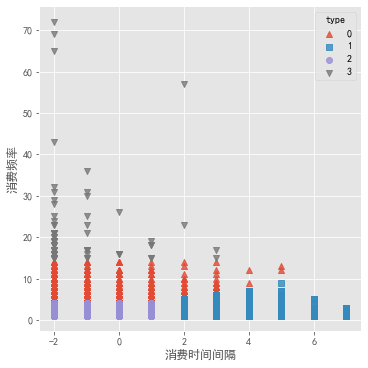

In [75]:
#可视化聚类结果
plt.style.use('ggplot')
# 四个簇的簇中心
#centers = model.cluster_centers_

# 绘制聚类效果的散点图
sns.lmplot(x = 'recent', y = 'fred', hue = 'type', markers = ['^','s','o','v'],data =rf_type, fit_reg = False, scatter_kws = {'alpha':0.8}, legend_out = False)
#plt.scatter(centers[:,0],centers[:,1], marker = '*', color = 'black', s = 130)
plt.xlabel('消费时间间隔')
plt.ylabel('消费频率')
# 图形显示
plt.show()




No handles with labels found to put in legend.


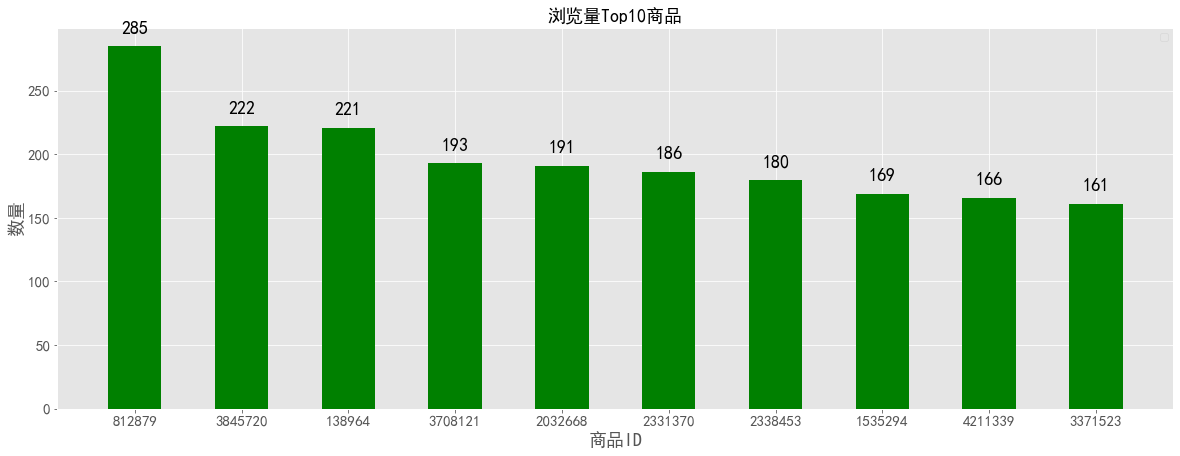

No handles with labels found to put in legend.


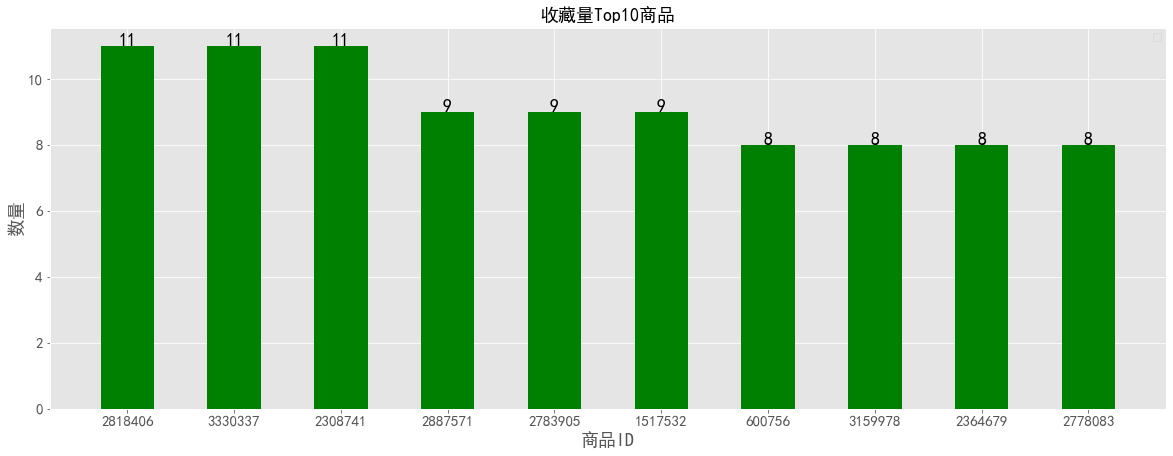

No handles with labels found to put in legend.


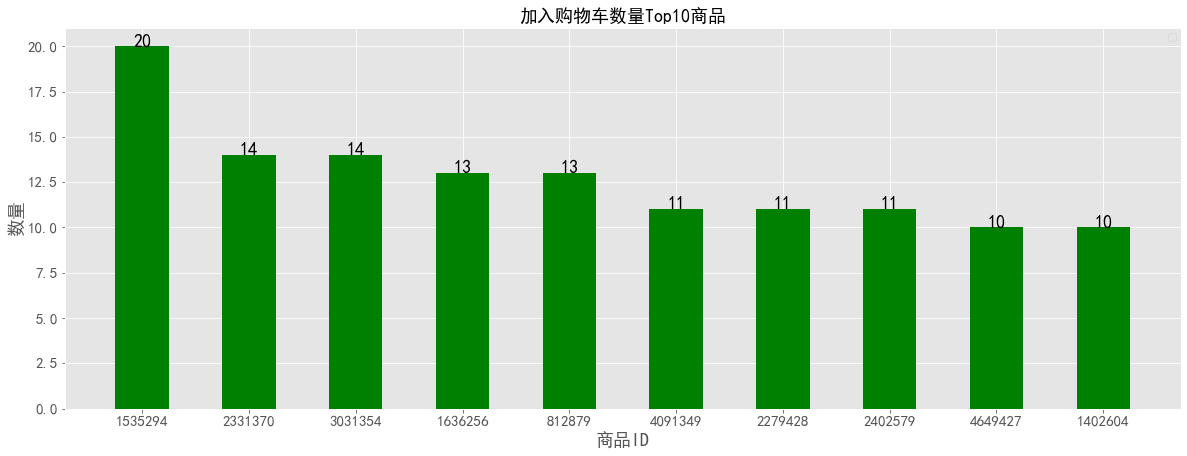

No handles with labels found to put in legend.


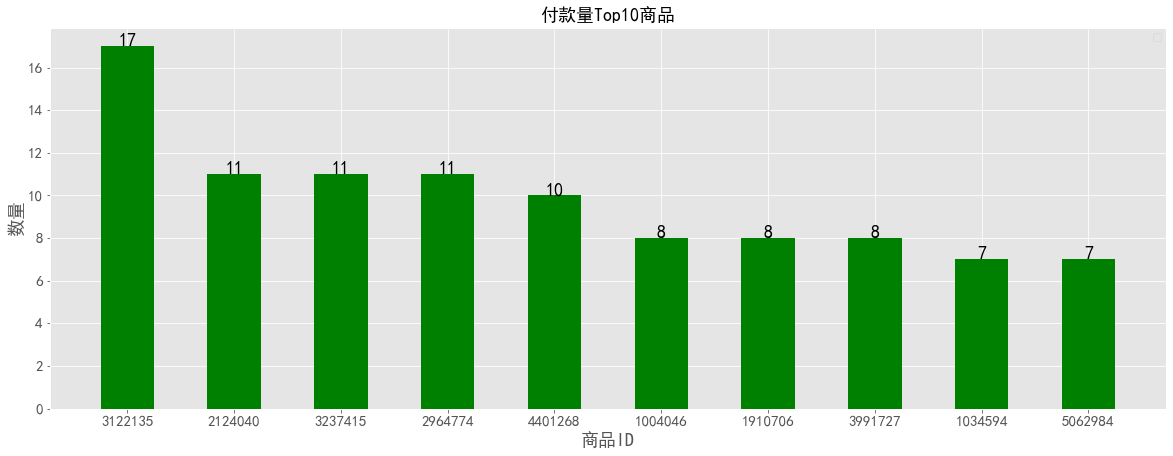

In [37]:
#不同行为top10的商品
plt.figure(figsize=(20,7))
product_1= data[data.行为类型 == 'pv']['商品ID'].value_counts().head(10) # 商品统计
X=product_1.index
Y=product_1.values
plt.bar(range(len(X)),Y,tick_label=X,color='g',width=0.5) 
for x,y in enumerate(Y):
    plt.text(x,y+10,y,ha='center',fontsize=18)
font={'size':18,}
plt.ylabel('数量',font)
plt.xlabel('商品ID',font)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.legend()
plt.title('浏览量Top10商品',fontsize=18)
plt.show()

plt.figure(figsize=(20,7))
product_3= data[data.行为类型 == 'fav']['商品ID'].value_counts().head(10)
X=product_3.index
Y=product_3.values
plt.bar(range(len(X)),Y,tick_label=X,color='g',width=0.5) 
for x,y in enumerate(Y):
    plt.text(x,y,y,ha='center',fontsize=18)
font={'size':18,}
plt.ylabel('数量',font)
plt.xlabel('商品ID',font)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.legend()
plt.title('收藏量Top10商品',fontsize=18)
plt.show()

plt.figure(figsize=(20,7))
product_2= data[data.行为类型 == 'cart']['商品ID'].value_counts().head(10)
X=product_2.index
Y=product_2.values
plt.bar(range(len(X)),Y,tick_label=X,color='g',width=0.5) 
for x,y in enumerate(Y):
    plt.text(x,y,y,ha='center',fontsize=18)
font={'size':18,}
plt.ylabel('数量',font)
plt.xlabel('商品ID',font)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.legend()
plt.title('加入购物车数量Top10商品',fontsize=18)
plt.show()

plt.figure(figsize=(20,7))
product_4= data[data.行为类型 == 'buy']['商品ID'].value_counts().head(10)
X=product_4.index
Y=product_4.values
plt.bar(range(len(X)),Y,tick_label=X,color='g',width=0.5) 
for x,y in enumerate(Y):
    plt.text(x,y,y,ha='center',fontsize=18)
font={'size':18,}
plt.ylabel('数量',font)
plt.xlabel('商品ID',font)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.legend()
plt.title('付款量Top10商品',fontsize=18)
plt.show()

In [50]:
#分析出每个用户对商品的不同行为
one_hot_data=pd.get_dummies(data['行为类型'])
user_item_behavior_data=pd.concat((data[['用户id','商品ID']],one_hot_data),axis=1)#对两张表进行横向拼接
user_item_behavior_data.head()

,用户id,商品ID,buy,cart,fav,pv
502571,106286,895163,0,0,0,1
960603,126879,2900011,0,0,0,1
513671,106838,1421743,0,0,0,1
401553,10199,4657546,0,0,0,1
748100,117257,67901,0,1,0,0


In [51]:
#分析出每个用户对商品的不同行为的a汇总
#对用户分组（考虑用户的重复情况）
pv_sum=user_item_behavior_data.groupby(by='用户id')['pv'].sum()
buy_sum=user_item_behavior_data.groupby(by='用户id')['buy'].sum()
cart_sum=user_item_behavior_data.groupby(by='用户id')['cart'].sum()
fav_sum=user_item_behavior_data.groupby(by='用户id')['fav'].sum()

In [52]:
user_behavior_total_data=pd.DataFrame(data=[pv_sum,buy_sum,cart_sum,fav_sum]).T#.T为转置
user_behavior_total_data.head()

,pv,buy,cart,fav
用户id,,,,
1,55.0,0.0,0.0,0.0
100,84.0,8.0,0.0,6.0
115,227.0,0.0,3.0,11.0
117,156.0,10.0,4.0,0.0
118,90.0,0.0,0.0,0.0
